https://github.com/naity/image_tabular/blob/master/siim_isic_integrated_model.ipynb

# Imports

In [1]:
import pandas as pd
import torch
import tensorflow
import fastai
from fastai.vision.all import *
from fastai.tabular.all import *  
import image_tabular
'''from image_tabular.core import *
from image_tabular.dataset import *
from image_tabular.model import *
from image_tabular.metric import *'''
# use gpu by default if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-06-07 16:00:14.561547: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load Data

In [2]:
# Image Data
df = pd.read_csv("../Data/final_dataset_cnn.csv")
df = df.dropna()
df

,views,thumbnail_link
0,17158579,n1WpP7iowLc
1,1014651,0dBIkQ4Mz1M
3,2095828,d380meD0W0M
4,33523622,2Vv-BfVoq4g
5,1309699,0yIWz1XEeyc
...,...,...
94,786155,AE8tATPge7o
95,150974,zxuvr9tN924
96,70448,dKBThyjj0J0
97,135620,pQgPR2V6924


In [95]:
# Tabular Data
df_tab = pd.read_csv("../Data/final_dataset.csv")
df_tab = df_tab[:100]
df_tab 

,category_id,views,likes,dislikes,comment_count,title_1,title_2,title_3,title_4,title_5,...,thumbnail_link_7,country,comments_disabled,ratings_disabled,video_error_or_removed,description_915,thumbnail_link_8,thumbnail_link_9,thumbnail_link_10,thumbnail_link_11
0,10.0,17158579.0,787425.0,43420.0,125882.0,764.0,661.0,18.0,437.0,124.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23.0,1014651.0,127794.0,1688.0,13030.0,6061.0,225.0,718.0,647.0,2093.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23.0,3191434.0,146035.0,5339.0,8181.0,743.0,1764.0,777.0,1402.0,465.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24.0,2095828.0,132239.0,1989.0,17518.0,52.0,2159.0,45.0,609.0,5450.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.0,33523622.0,1634130.0,21082.0,85067.0,549.0,662.0,338.0,22.0,59.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,24.0,150974.0,220.0,65.0,201.0,755.0,590.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,24.0,70448.0,1538.0,25.0,315.0,695.0,1174.0,71.0,3.0,1237.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,25.0,135620.0,379.0,86.0,449.0,11.0,11.0,135.0,24.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,22.0,88061.0,47.0,58.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


https://towardsdatascience.com/integrating-image-and-tabular-data-for-deep-learning-9281397c7318

## Train - Test - Split

# Prepare Data

## Image Data

In [105]:
import fastai

In [3]:
# load image data uwith fastai ImageDataLoaders

image_data = (ImageDataLoaders.from_df(df, path="../Data/", fn_col="thumbnail_link",
                               folder="thumbnails", suff=".jpg", label_col="views")
)

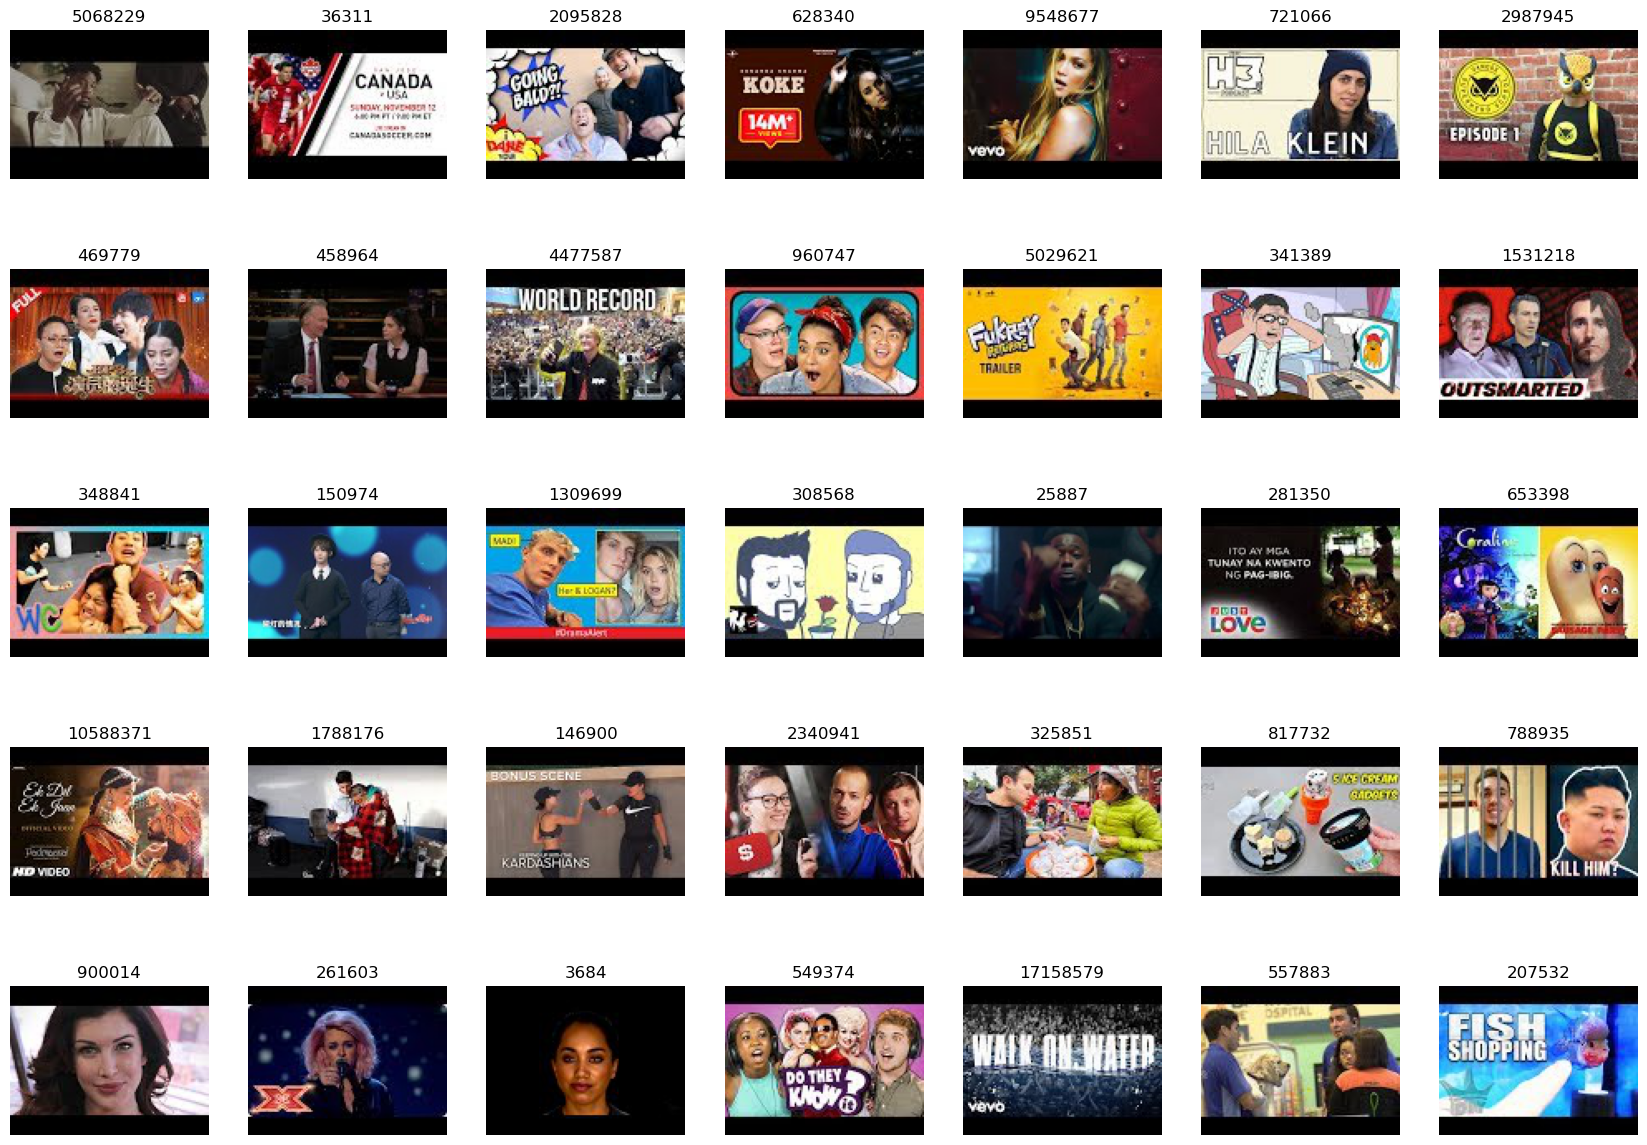

In [4]:

# show example images from tarining batch with label
image_data.train.show_batch(max_n = 35)

## Tabular Data

In [102]:
list = df_tab.drop(['views','likes','dislikes','comment_count'], axis=1).columns.to_list()

In [112]:
target = 'views'
cat_names = []
cont_names = list
procs = []

In [113]:
tab_data = (TabularDataLoaders.from_df(df_tab , path="/", cat_names=cat_names, cont_names=cont_names, procs=procs, y_names=target)
)

In [114]:
tab_data.show_batch()

## Combine Data

In [125]:
! python setup.py install

Traceback (most recent call last):
  File "/Users/leamayer/Programmierung/YouTube_Stats_Forecasting/src/setup.py", line 13, in <module>
    for o in expected: assert o in cfg, "missing expected setting: {}".format(o)
AssertionError: missing expected setting: version


In [123]:
from image_tabular import *

ModuleNotFoundError: No module named 'image_tabular.all'

In [122]:
from image_tabular.core import *
from image_tabular.dataset import *
from image_tabular.model import *
from image_tabular.metric import *

NameError: name 'Dataset' is not defined

In [119]:
combined_train, combined_valid, combined_test = get_imagetabdatasets(image_data, tab_data)

NameError: name 'get_imagetabdatasets' is not defined

In [ ]:
# package train, valid, and test datasets into a fastai databunch
bs = 64

db = DataBunch.create(combined_train, combined_valid, combined_test,
                      path="", bs=bs)
db
   

In [ ]:

# image normalization with imagenet_stats
db.norm, db.denorm = normalize_funcs_image_tab(*imagenet_stats)
db.add_tfm(db.norm)

In [ ]:
# check the shape of one batch
x, y = next(iter(db.train_dl))
len(x)

In [ ]:
# images
x[0].shape

In [ ]:
# categorical and continuous tabular data 
x[1][0].shape, x[1][1].shape

In [ ]:
# targets
y.shape

In [7]:

# load image data using train_df and prepare fastai LabelLists
image_data = (ImageList.from_df(train_df, path=data_path, cols="image_name",
                               folder="train_128", suffix=".jpg")
              .split_by_idx(val_idx)
              .label_from_df(cols="target")
              .transform(tfms, size=size))

# add test data so that we can make predictions
test_image_data = ImageList.from_df(test_df, path=data_path, cols="image_name",
                                    folder="test_128", suffix=".jpg")
image_data.add_test(test_image_data)

tab_data = (TabularList.from_df(train_df, path=data_path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(val_idx)
                           .label_from_df(cols=dep_var))

# add test
tab_data.add_test(TabularList.from_df(test_df, cat_names=cat_names, cont_names=cont_names,
                                      processor = tab_data.train.x.processor))

NameError: name 'ImageList' is not defined

# Define Tabular Model

In [ ]:
# get embedding sizes of categorical data
emb_szs = tab_data.train.get_emb_szs()

# output size of the tabular model that will be concatenated with cnn model output
tab_out_sz = 8

# use fastai functions to get a tabular model
tabular_model = TabularModel(emb_szs, len(cont_names), out_sz=tab_out_sz, layers=[8], ps=0.2)
tabular_model

# Define CNN Model

In [ ]:
# https://walkwithfastai.com/Scalar_Regression

In [6]:
from fastai.vision.learner import cnn_learner

from torchvision.models.resnet import resnet50

In [7]:
from fastai.metrics import mae

learn = cnn_learner(image_data, resnet50, loss_func=MSELossFlat(), metrics=mae)

In [8]:
learn.lr_find()

/usr/local/Caskroom/miniconda/base/envs/yputube_2/lib/python3.10/site-packages/torch/_tensor.py:1295: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([4160])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  ret = func(*args, **kwargs)


RuntimeError: The size of tensor a (4160) must match the size of tensor b (64) at non-singleton dimension 0

In [ ]:
learn.fine_tune(5, 1e-2)

In [127]:
# package everything in a fastai learner, add auc roc score as a metric
learn = cnn_learner(image_data, models.resnet50, lin_ftrs=[512, 256, 32], ps=0.2,
                    metrics=[accuracy])

/usr/local/Caskroom/miniconda/base/envs/yputube_2/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/Caskroom/miniconda/base/envs/yputube_2/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/yputube_2/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [93]:
# cnn model for images, use Resnet50 as an example
cnn_arch = models.resnet50

# cnn_out_sz is the output size of the cnn model that will be concatenated with tabular model output
cnn_out_sz = 256

# use fastai functions to get a cnn model
image_data_db = image_data.databunch()
image_data_db.c = cnn_out_sz
cnn_learn = cnn_learner(image_data_db, cnn_arch, ps=0.2)
cnn_model = cnn_learn.model

AttributeError: databunch

# Create a Joint Model 

In [ ]:
# https://github.com/naity/image_tabular
# ! pip install image_tabular

integrate_model = CNNTabularModel(cnn_model,
                                  tabular_model,
                                  layers = [cnn_out_sz + tab_out_sz, 32],
                                  ps=0.2,
                                  out_sz=2).to(device)

In [ ]:
# adjust loss function weight because the dataset is extremely unbalanced
weights = [1/(1-train_df["target"].mean()), 1/train_df["target"].mean()]
loss_func = CrossEntropyFlat(weight=torch.FloatTensor(weights).to(device))

In [ ]:
# package everything in a fastai learner, add auc roc score as a metric
learn = Learner(db, integrate_model, metrics=[accuracy, ROCAUC()], loss_func=loss_func)

In [ ]:
# organize layer groups in order to use differential learning rates provided by fastai
# the first two layer groups are earlier layers of resnet
# the last layer group consists of the fully connected layers of cnn model, tabular model,
# and final fully connected layers for the concatenated data
learn.layer_groups = [nn.Sequential(*flatten_model(cnn_learn.layer_groups[0])),
                      nn.Sequential(*flatten_model(cnn_learn.layer_groups[1])),
                      nn.Sequential(*(flatten_model(cnn_learn.layer_groups[2]) +
                                      flatten_model(integrate_model.tabular_model) +
                                      flatten_model(integrate_model.layers)))]

## Training

In [ ]:
# find learning rate to train the last layer group first 
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
# train
learn.fit_one_cycle(10, 1e-4)

In [ ]:
# unfreeze all layer groups to train the entire model using differential learning rates
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-6, 1e-4))

## Prediction

In [ ]:
# make predictions for the test set
preds, y = learn.get_preds(DatasetType.Test)